In [201]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from math import log
import matplotlib.pyplot as plt
from scipy.special import rel_entr

from sklearn import datasets
from sklearn.datasets import make_regression

# Pre-processamento
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier

# Classificadores
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

# Modelos
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression

# Metricas
# Outras métricas https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics
#
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score,fbeta_score, roc_auc_score, roc_curve
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import ConfusionMatrixDisplay

# [Exemplo](https://acervolima.com/divergencia-kullback-leibler/)
Suponha que haja duas caixas que contenham 4 tipos de bolas (verde, azul, vermelha, amarela). Uma bola é retirada da caixa aleatoriamente com as probabilidades fornecidas. Nossa tarefa é calcular a diferença de distribuições de duas caixas, isto é, divergência KL.

In [7]:



# box =[P(green),P(blue),P(red),P(yellow)]
box_1 = [0.25, 0.33, 0.23, 0.19]
box_2 = [0.21, 0.21, 0.32, 0.26]
  
  
def kl_divergence(a, b):
    return sum(a[i] * np.log(a[i]/b[i]) for i in range(len(a)))
    
print('KL-divergence(box_1 || box_2): %.3f ' % kl_divergence(box_1,box_2))
print('KL-divergence(box_2 || box_1): %.3f ' % kl_divergence(box_2,box_1))
  
# D( p || p) =0
print('KL-divergence(box_1 || box_1): %.3f ' % kl_divergence(box_1,box_1))
  
print("Using Scipy rel_entr function")
box_1 = np.array(box_1)
box_2 = np.array(box_2)
  
print('KL-divergence(box_1 || box_2): %.3f ' % sum(rel_entr(box_1,box_2)))
print('KL-divergence(box_2 || box_1): %.3f ' % sum(rel_entr(box_2,box_1)))
print('KL-divergence(box_1 || box_1): %.3f ' % sum(rel_entr(box_1,box_1)))


KL-divergence(box_1 || box_2): 0.057 
KL-divergence(box_2 || box_1): 0.056 
KL-divergence(box_1 || box_1): 0.000 
Using Scipy rel_entr function
KL-divergence(box_1 || box_2): 0.057 
KL-divergence(box_2 || box_1): 0.056 
KL-divergence(box_1 || box_1): 0.000 


In [115]:
import sys
!{sys.executable} -m pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 356.8 kB/s eta 0:00:0031m1.4 MB/s eta 0:00:01


In [203]:
# ---------------------------------
# Exemplo com dados artificiais
# ---------------------------------

# calculando o AIC
def calculate_aic(n, mse, num_params):
 aic = n * log(mse) + 2 * num_params
 return aic

# calculando o BIC
def calculate_bic(n, mse, num_params):
 bic = n * log(mse) + num_params * log(n)
 return bic

# Gerando valores para uma regressão
X, y = make_regression(n_samples=100, n_features=2, noise=0.1)

In [204]:
# define and fit the model on all data
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [205]:
# numbero de parametros
num_params = len(model.coef_) + 1
print('Número de parametros: %d' % (num_params))

Número de parametros: 3


In [28]:
# ------------------------------
# Calculando valores ajustados
yhat = model.predict(X)
# -----------------------------

# --------------------------
# calculando MSE
# --------------------------
mse = mean_squared_error(y, yhat)
print('MSE: %.3f' % mse)

MSE: 0.009


In [31]:
# --------------------------
# calculando AIC
# --------------------------
aic = calculate_aic(len(y), mse, num_params)
print('AIC: %.3f' % aic)

AIC: -462.607


In [32]:
# --------------------------
# calculando BIC
# --------------------------
bic = calculate_bic(len(y), mse, num_params)
print('BIC: %.3f' % bic)

BIC: -454.791


In [145]:
# Exemplo
# O German Credit Data é um dataset sobre análise de risco de crédito bancário
# serve para classificar se uma pessoa tem risco alto ou baixo com base em uma 
# série de atributos.

dataset = pd.read_csv('dataset/credit-g.csv')
dataset_dummies = pd.get_dummies(dataset, columns=['checking_status', 'credit_history', 'purpose', 'savings_status', 'employment', 
                                'personal_status', 'other_parties', 'property_magnitude', 'other_payment_plans', 'housing',
                                'job', 'own_telephone', 'foreign_worker'], drop_first=True)

label_encoder = LabelEncoder()
dataset_dummies['class'] = label_encoder.fit_transform(dataset_dummies['class'])
X = dataset_dummies.drop(axis=1, columns=['class'])
y = dataset_dummies[['class']]

scaler = MinMaxScaler()
X = scaler.fit_transform(X)
y = y.values.ravel()

model = MLPClassifier(hidden_layer_sizes=(25, 25), max_iter=200, random_state=42)
model.fit(X, y)
print("Acurácia: ", model.score(X, y))

Acurácia:  0.972


In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

model = MLPClassifier(hidden_layer_sizes=(25, 25), max_iter=200, random_state=42)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7090909090909091

### Outras métricas https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

The common metrics provided by sklearn are passable as a string into this parameter, where some typical choices would be:

    ‘accuracy’
    ‘balanced_accuracy’
    ‘roc_auc’
    ‘f1’
    ‘neg_mean_absolute_error’
    ‘neg_root_mean_squared_error’
    ‘r2’

In [138]:
scores = cross_val_score(model, X, y, cv=10, scoring='accuracy')
print(scores)

[0.78 0.68 0.68 0.72 0.72 0.7  0.73 0.72 0.74 0.68]


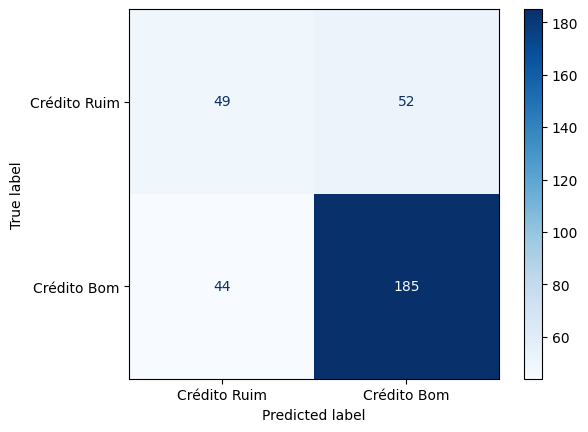

In [139]:
y_pred = model.predict(X_test)

mc = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=mc, display_labels=['Crédito Ruim', 'Crédito Bom']).plot(cmap=plt.cm.Blues)
plt.show()

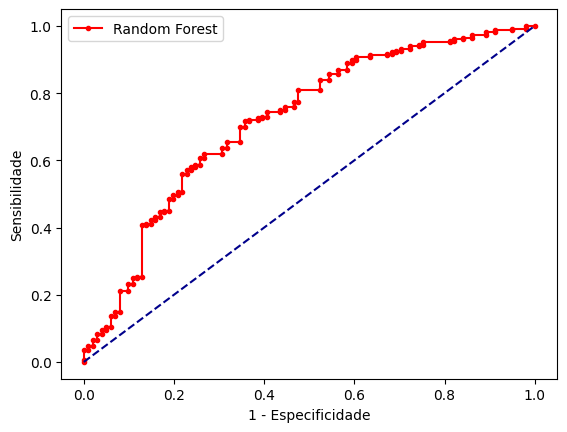

ROC AUC: 0.646504


In [140]:
rf_prob = model.predict_proba(X_test)
probs = rf_prob[:, 1]
rfp, rvp,lim = roc_curve(y_test, probs)

# gráfico da curva roc
plt.plot(rfp, rvp, marker='.', label='Random Forest',color="red")
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')

# axis labels
plt.xlabel('1 - Especificidade')
plt.ylabel('Sensibilidade')
plt.legend()
plt.show()

print('ROC AUC: %.6f' % roc_auc_score(y_test, y_pred))

In [141]:
# ----------------------------
# Dados de câncer de mama
# ----------------------------
bc = datasets.load_breast_cancer()
X = bc.data
y = bc.target

# ----------------------------------------
# Data splitting: Dados de treino e teste
# ----------------------------------------

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

Score hold-out: 0.9707602339181286


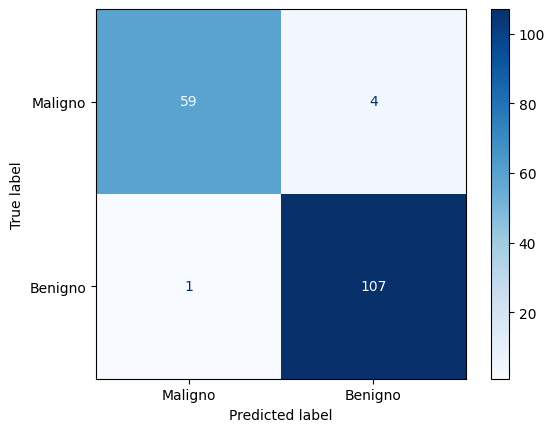

In [142]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
print('Score hold-out:', model.score(X_test, y_test))

y_pred = model.predict(X_test)

conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Maligno', 'Benigno']).plot(cmap=plt.cm.Blues)
plt.show()

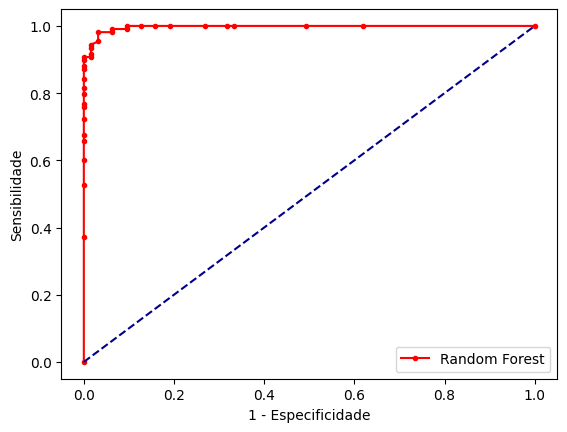

ROC AUC: 0.963624


In [143]:
rf_prob = model.predict_proba(X_test)
probs = rf_prob[:, 1]
rfp, rvp,lim = roc_curve(y_test, probs)

# gráfico da curva roc
plt.plot(rfp, rvp, marker='.', label='Random Forest',color="red")
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')

# axis labels
plt.xlabel('1 - Especificidade')
plt.ylabel('Sensibilidade')
plt.legend()
plt.show()

print('ROC AUC: %.6f' % roc_auc_score(y_test, y_pred))

In [109]:
# validação cruzada k-fold

model = RandomForestClassifier(random_state=42)
scores = cross_val_score(model, X, y, cv=10)

print('Scores 10-fold cross-validation:', scores)
print('\nMédia 10-fold cross-validation:', scores.mean())
print('\nDesvio padrão 10-fold cross-validation:', scores.std())

Scores 10-fold cross-validation: [0.98245614 0.89473684 0.94736842 0.94736842 1.         0.98245614
 0.94736842 0.98245614 0.94736842 1.        ]

Média 10-fold cross-validation: 0.9631578947368421

Desvio padrão 10-fold cross-validation: 0.030839290932012185


In [200]:
# Outro exemplo

def KFold_vc(x_axis, y_axis):

    kfold  = KFold(n_splits=10, shuffle=True) # shuffle=True, (embaralhar)

    # Axis
    x = x_axis
    y = y_axis

    linearRegression = LinearRegression()
    elasticNet = ElasticNet()
    ridge = Ridge()
    lasso = Lasso()

    #----------------------------------
    # Modelos contemplados na análise
    #----------------------------------
    linearRegression_result = cross_val_score(linearRegression, x, y, cv = kfold, scoring="neg_root_mean_squared_error")
    elasticNet_result       = cross_val_score(elasticNet, x, y, cv = kfold, scoring="neg_root_mean_squared_error")
    ridge_result            = cross_val_score(ridge, x, y, cv = kfold, scoring="neg_root_mean_squared_error")
    lasso_result            = cross_val_score(lasso, x, y, cv = kfold, scoring="neg_root_mean_squared_error")

    dic_models = {
    "Regressão Linear": linearRegression_result.mean(),
    "ElasticNet": elasticNet_result.mean(),
    "Regressão Ridge": ridge_result.mean(),
    "Lasso": lasso_result.mean()
    }
    
    #----------------------------------
    # Selecionando o modelo
    #----------------------------------
    bestModel = max(dic_models, key=dic_models.get)

    print("Regressão Linear: {0}\nElastic Net: {1}\nRegressão Ridge: {2}\nLasso: {3}".format(round(linearRegression_result.mean(),4), round(elasticNet_result.mean(),4), round(ridge_result.mean(),4), round(lasso_result.mean(),4)))
    print("\nModelo com melhor desempenho: {0}".format(bestModel))


df = pd.read_csv("dataset/Admission_Predict.csv")
df.drop('Serial No.', axis = 1, inplace = True)

X = df.drop('Chance of Admit ', axis = 1)
y = df['Chance of Admit ']

KFold_vc(X, y)

Regressão Linear: -0.0638
Elastic Net: -0.0949
Regressão Ridge: -0.0634
Lasso: -0.1205

Modelo com melhor desempenho: Regressão Ridge
